In [1]:
! pip install opendatasets

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import opendatasets as od
from tqdm import tqdm
from keras.preprocessing import image
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, classification_report, roc_auc_score)

# 0c62d236c1acac72831d5af40d38933c

In [3]:
od.download('https://www.kaggle.com/datasets/catherinehorng/dogbreedidfromcomp/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: EVILSPIRIT05
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/catherinehorng/dogbreedidfromcomp


100%|██████████| 691M/691M [00:00<00:00, 1.36GB/s]


In [4]:
# Read the labels.csv file and checking shape and records
labels_all = pd.read_csv("/content/dogbreedidfromcomp/labels.csv")
print(labels_all.shape)
labels_all.head()

(10222, 2)


id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [5]:
# Selecting first 3 breeds (Limitation due to computation power)
CLASS_NAMES = ['scottish_deerhound','maltese_dog','bernese_mountain_dog']
labels = labels_all[(labels_all['breed'].isin(CLASS_NAMES))]
labels = labels.reset_index()
labels.head()

index                                id                 breed
0      9  0042188c895a2f14ef64a918ed9c7b64    scottish_deerhound
1     12  00693b8bc2470375cc744a6391d397ec           maltese_dog
2     79  01e787576c003930f96c966f9c3e1d44    scottish_deerhound
3     90  022b34fd8734b39995a9f38a4f3e7b6b           maltese_dog
4    118  02d54f0dfb40038765e838459ae8c956  bernese_mountain_dog

In [6]:
# Creating numpy matrix with zeros
X_data = np.zeros((len(labels), 224, 224, 3), dtype='float32')
# One hot encoding
Y_data = label_binarize(labels['breed'], classes = CLASS_NAMES)

# Reading and converting image to numpy array and normalizing dataset
for i in tqdm(range(len(labels))):
    img = image.load_img('/content/dogbreedidfromcomp/train/%s.jpg' % labels['id'][i], target_size=(224, 224))
    img = image.img_to_array(img)
    x = np.expand_dims(img.copy(), axis=0)
    X_data[i] = x / 255.0

# Printing train image and one hot encode shape & size
print('\nTrain Images shape: ',X_data.shape,' size: {:,}'.format(X_data.size))
print('One-hot encoded output shape: ',Y_data.shape,' size: {:,}'.format(Y_data.size))

100%|██████████| 357/357 [00:00<00:00, 520.21it/s]


Train Images shape:  (357, 224, 224, 3)  size: 53,738,496
One-hot encoded output shape:  (357, 3)  size: 1,071


# Building the Model

In [7]:
# Building the Model
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (5,5), activation ='relu', input_shape = (224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 16, kernel_size = (7,7), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 8, kernel_size = (5,5), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation = "relu", kernel_regularizer = 'l2'))
model.add(Dense(64, activation = "relu", kernel_regularizer = 'l2'))
model.add(Dense(len(CLASS_NAMES), activation = "softmax"))

model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 220, 220, 64)   │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 108, 108, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 48, 48, 16)     │        25,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 24, 24, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 20, 20, 8)      │         3,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 10, 10, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 162,619 (635.23 KB)

 Trainable params: 162,619 (635.23 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Splitting the data set into training and testing data sets
X_train_and_val, X_test, Y_train_and_val, Y_test = train_test_split(X_data, Y_data, test_size = 0.1)
# Splitting the training data set into training and validation data sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train_and_val, Y_train_and_val, test_size = 0.2)

In [9]:
# Training the model
epochs = 100
batch_size = 128

history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs,
                    validation_data = (X_val, Y_val))

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.3490 - loss: 4.9005 - val_accuracy: 0.3538 - val_loss: 4.8688
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 282ms/step - accuracy: 0.3490 - loss: 4.8671 - val_accuracy: 0.3538 - val_loss: 4.8449
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 281ms/step - accuracy: 0.3646 - loss: 4.8396 - val_accuracy: 0.3538 - val_loss: 4.8212
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 282ms/step - accuracy: 0.3750 - loss: 4.8144 - val_accuracy: 0.3538 - val_loss: 4.7973
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 282ms/step - accuracy: 0.3594 - loss: 4.7917 - val_accuracy: 0.3538 - val_loss: 4.7733
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 282ms/step - accuracy: 0.3464 - loss: 4.7695 - val_accuracy: 0.3538 - val_loss: 4.7490
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 281ms/step - accuracy: 0.3438 - loss: 4.7450 - val_accuracy: 0.3538 - val_loss: 4.7245
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 283ms/step - accuracy: 0.3542 - loss: 4.7196 - val_accuracy: 0.3538 - val

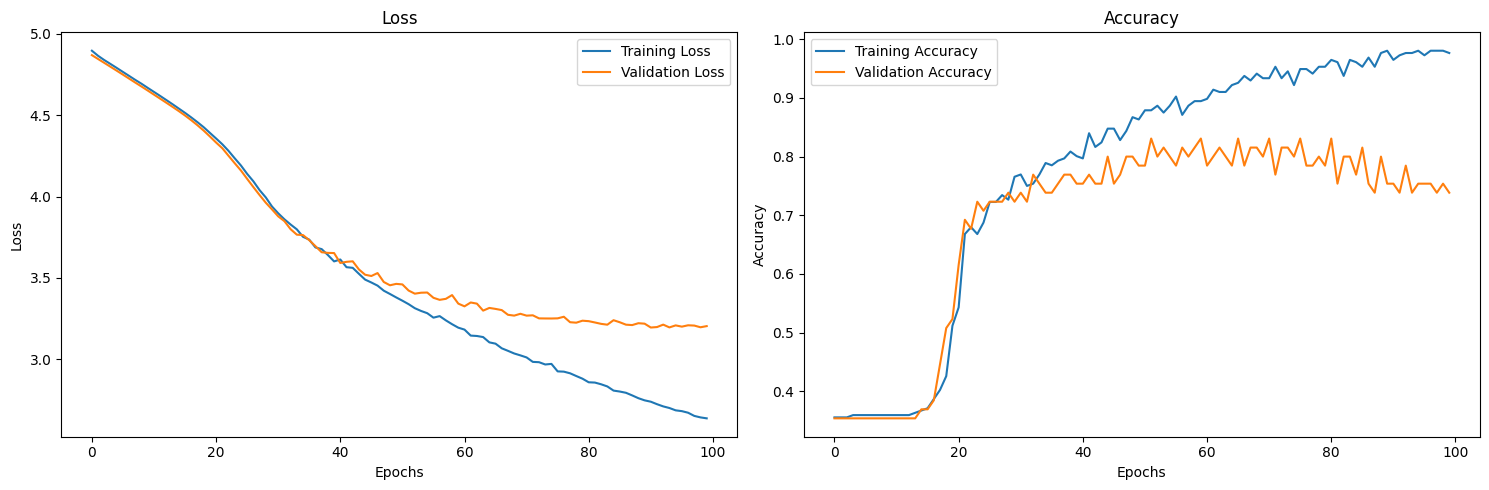

In [10]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
Y_pred = model.predict(X_test)
score = model.evaluate(X_test, Y_test)
print('Accuracy over the test set: \n ', round((score[1]*100), 2), '%')

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 628ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step - accuracy: 0.5868 - loss: 3.8482
Accuracy over the test set: 
  58.33 %


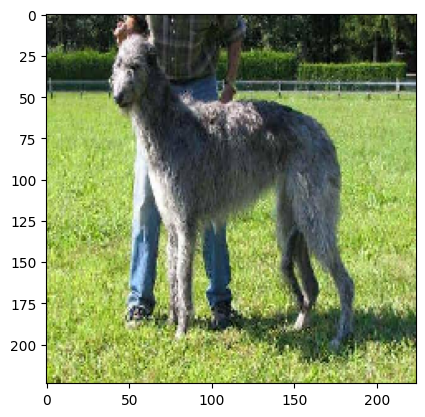

Originally :  scottish_deerhound
Predicted :  scottish_deerhound


In [12]:
# Plotting image to compare
plt.imshow(X_test[1,:,:,:])
plt.show()

# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",labels['breed'][np.argmax(Y_test[1])])
print("Predicted : ",labels['breed'][np.argmax(Y_pred[1])])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


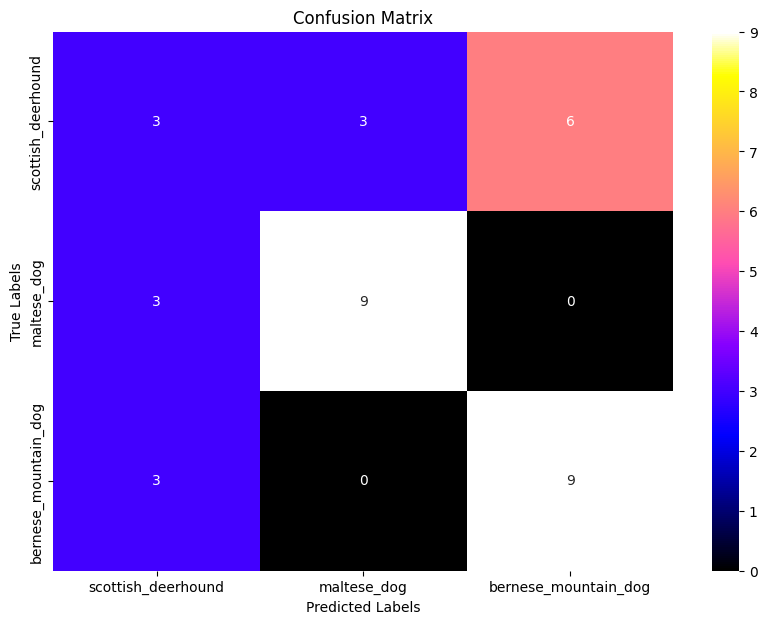

In [25]:
import seaborn as sns
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)
cm = confusion_matrix(Y_test, y_pred)

# Plotting confusion matrix using Seaborn heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="gnuplot2",xticklabels=CLASS_NAMES,yticklabels=CLASS_NAMES)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

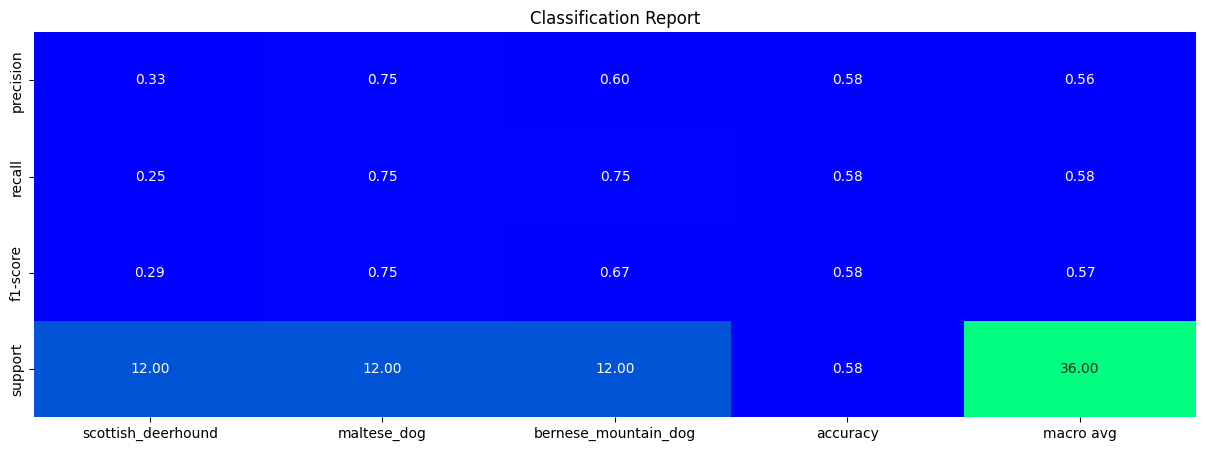

In [30]:
import pandas as pd
report = classification_report(y_true, y_pred, target_names=CLASS_NAMES, output_dict=True)

report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(15, 5))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap="winter", fmt='.2f', cbar=False)
plt.title('Classification Report')
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


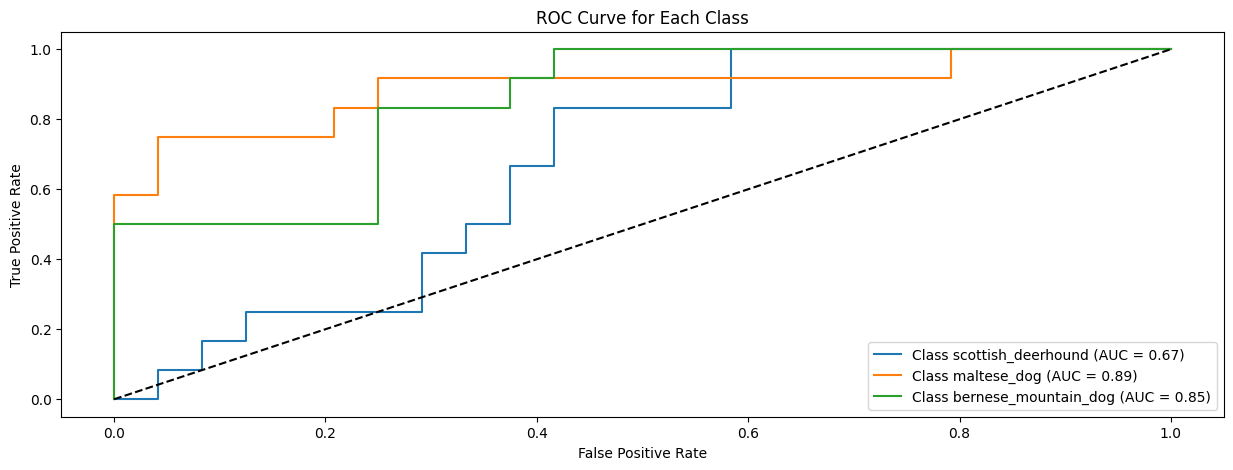

In [33]:

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

y_true_bin = label_binarize(y_true, classes=[0, 1, 2])

y_pred_prob = model.predict(X_test)

plt.figure(figsize=(15, 5))

for i in range(len(CLASS_NAMES)):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_prob[:, i])
    auc = roc_auc_score(y_true_bin[:, i], y_pred_prob[:, i])
    plt.plot(fpr, tpr, label=f'Class {CLASS_NAMES[i]} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc='lower right')
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


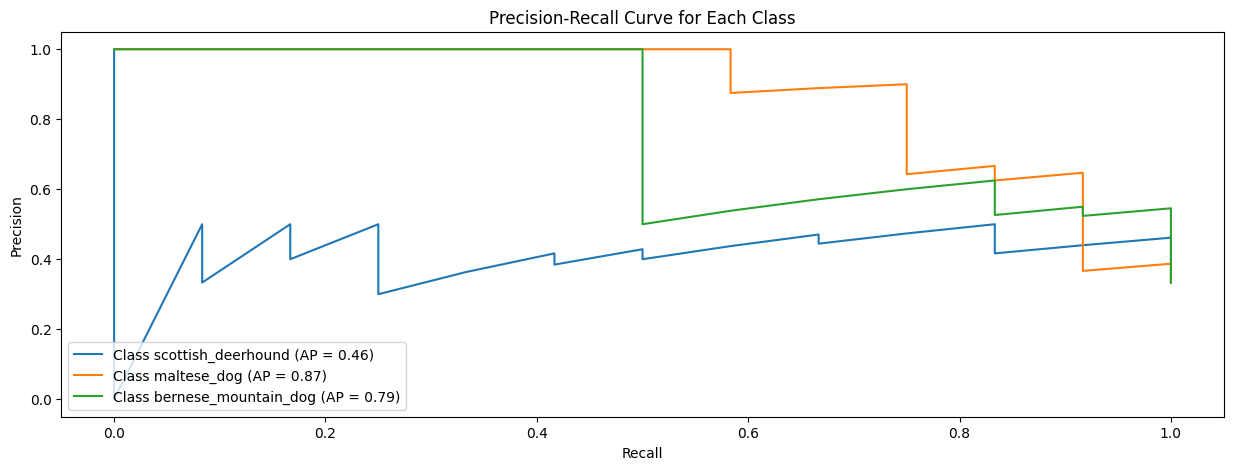

In [37]:
from sklearn.metrics import precision_recall_curve, average_precision_score

y_true_bin = label_binarize(y_true, classes=[0, 1, 2])

y_pred_prob = model.predict(X_test)

plt.figure(figsize=(15, 5))

for i in range(len(CLASS_NAMES)):
    precision, recall, _ = precision_recall_curve(y_true_bin[:, i], y_pred_prob[:, i])
    ap_score = average_precision_score(y_true_bin[:, i], y_pred_prob[:, i])
    plt.plot(recall, precision, label=f'Class {CLASS_NAMES[i]} (AP = {ap_score:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Each Class')
plt.legend(loc='lower left')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


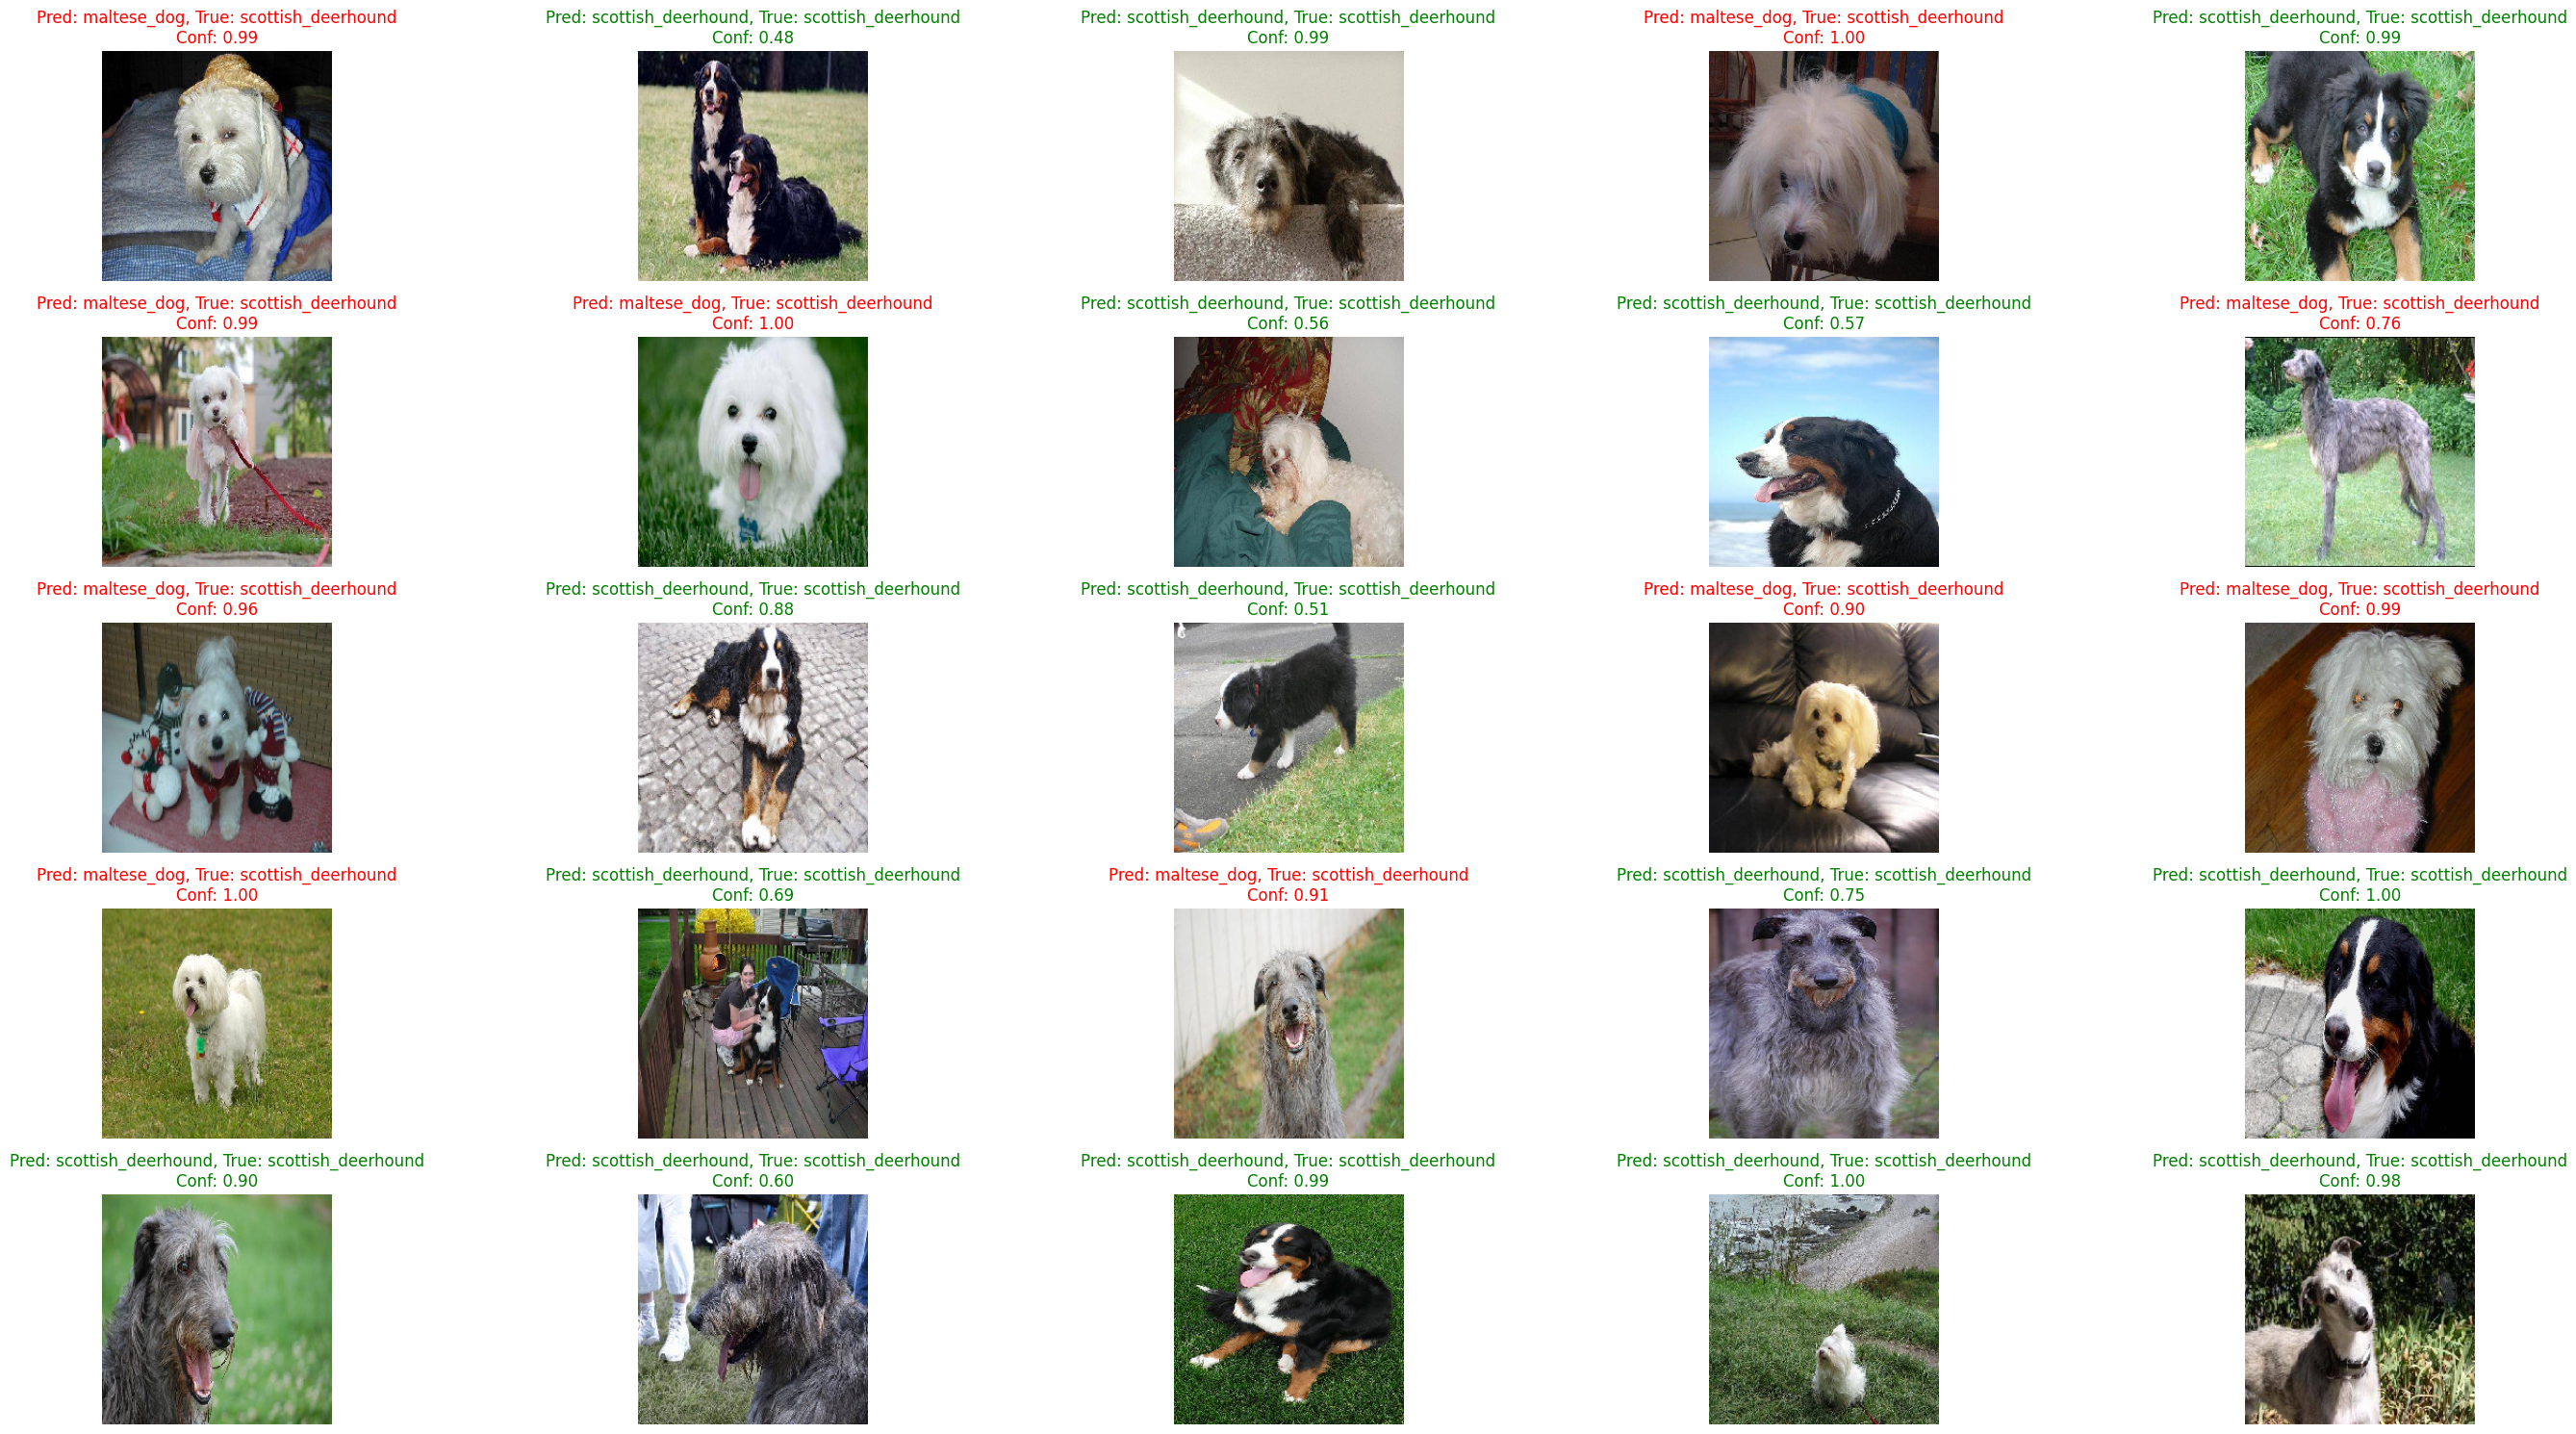

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Select 25 random samples from the test set
indices = np.random.choice(len(X_test), 25, replace=False)

# Set up the 5x5 grid of subplots
plt.figure(figsize=(30, 15))

for i, idx in enumerate(indices):
    plt.subplot(5, 5, i + 1)

    # Get the image and prediction
    img = X_test[idx]
    true_label = labels['breed'][np.argmax(Y_test[idx])]
    y_pred_prob = model.predict(np.expand_dims(img, axis=0))
    pred_label = labels['breed'][np.argmax(y_pred_prob)]
    confidence = np.max(y_pred_prob)

    # Display the image
    plt.imshow(img)
    plt.axis('off')

    # Check if the predicted label matches the true label
    if true_label == pred_label:
        plt.title(f'Pred: {pred_label}, True: {true_label}\nConf: {confidence:.2f}', color='green')
    else:
        plt.title(f'Pred: {pred_label}, True: {true_label}\nConf: {confidence:.2f}', color='red')

plt.tight_layout()
plt.show()


In [40]:
model.save('my_model.keras')